# Homework 7

## Enya Liu

## Supprt Vector Machine 

In [59]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Your allowed to use only the above libraries that are imported. No other libs should be used in this assignment. 

## Heart Dataset 

In this Assignment we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [60]:
# Your code here
heart_df = pd.read_csv("Heart.csv")
# heart_df = pd.read_csv(r'C:\Users\Ley\Desktop\Heart.csv')
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Task - 1 (4 points)
We want to use **Suppert Vector Machine** to perdict if the patients will have heart problems or not. The column "Target" in our datasets includes data about heart diseases. If the patient had heart disease we have a 1 and if not a zero. 

Prepare your data set for predicting heart disease ("Target" column) out of 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 


Split your data into 80% traning data and 20% test data, and implement Support Vector Machine using Scikit-Learn. 





In [61]:
# Add your code Here! 
# implement Support Vector Machine using Scikit-Learn
from sklearn import svm
X = np.array(heart_df[['Age','Sex','Chol']])
new_target = pd.Series(heart_df['Target'])
y = np.array(new_target.map({'Yes':1,'No':0}))
y = np.where(y ==0, -1, 1)

# create test/train
train_len = round(len(heart_df)*0.8)

X_train = X[:train_len]
y_train = y[:train_len]
X_test = X[train_len:]
y_test = y[train_len:]

model = svm.SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Task 2 - (4 points)

Cacluate the accuracy, Precision, Recall and F1 score of your **SVM** implementaion. 
Print the results. 


In [62]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

predictions = predict_svm(weights, X_test)

# precision = tp/(tp+fp)
# positive = 1
# negative = 0
tp=0
fp=0
fn=0
tn=0
for i in range(0,len(predictions)):
    if predictions[i] == 1 and predictions[i] == y_test[i]:
        tp += 1
    if predictions[i] == 1 and predictions[i] != y_test[i]:
        fp += 1
    if predictions[i] == 0 and predictions[i] != y_test[i]:
        fn += 1
    else:
        tn += 1
precision = tp/(tp+fp)
print('precision is',precision,'for 1')
recall = tp/(tp+fn)
print('recall is',recall,'for 1')
# f-measure
f_measure = 2*precision*recall/(precision+recall)
print('f-measure is',f_measure,'for 1')
print()
precision2 = tn / (tn + fn)
recall2 = tn / (tn + fp)
f_2 = 2 * precision2 * recall2 / (precision2 + recall2)
print('precision is', precision2,'for 0')
print('recall is: ', recall2,'for 0')
print('f-measure is', f_2,'for 0')

Accuracy Score: 0.5081967213114754
precision is 0.5333333333333333 for 1
recall is 1.0 for 1
f-measure is 0.6956521739130436 for 1

precision is 1.0 for 0
recall is:  0.7439024390243902 for 0
f-measure is 0.8531468531468531 for 0


# Task 3 - Implement SVM without using libraries  - (4 points)

Implement SVM from scratch using Hinge Loss function and Gradient Descent. 
Try to produce the same result as you get from the libraries. 


* Do as many iterations as needed 
* Do maximum **100 iterations**
* Use a very small learning rate for checking your GD implementation. 
* Your are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher. 
* Visualize your costs. 
* No need to add an y-intercept in this task. 
* You can use libraries to report accuracy, Precision, Recall and F1. 



In [63]:
# two useful functions
def compute_cost(X, y, W, regularization_factor):
    '''This function calculate the hinge loss. Primal Problem in SVM'''
    n = X.shape[0]
    distances = 1 - y * (np.dot(X, W))
    
    # This is our max(0, distance). 
    distances[distances < 0] = 0 
    
    hinge_loss = regularization_factor * (np.sum(distances) / n)
    # This divide by 2 is not important because we want only to check if this cost is going down or not. 
    return (1 / 2 * np.dot(W, W) + hinge_loss)

def calculate_gradient(X, y, W, regularization_factor):
      
    if type(y) == np.float64:
        y = np.array([y])
        X = np.array([X])
        
    distance = 1 - (y * np.dot(X, W))
    
    dw = np.zeros(len(W))
    
    for ind, d in enumerate(distance):
        
        if (d < 0):
            di = W
        else:
            di = W - (regularization_factor * y[ind] * X[ind])
            
            
        dw += di
    
    dw = dw/len(y)  # average
    
    return dw

# svm
weights = np.zeros(3)


# Now we optimize it using Gradient Descent. 
num_iterations = 100
learnin_rate = 0.01

regularization = 0.01

cost_list = []

for i in range(0, num_iterations):
    
    cost = compute_cost(X_train, y_train, weights, regularization)
    
    print("Epoch", i, "Cost is:", cost, "weights", weights)
    
    cost_list.append(cost)
    
    grad = calculate_gradient(X_train, y_train, weights, regularization)
    
    weights = weights - learnin_rate * grad


Epoch 0 Cost is: 0.01 weights [0. 0. 0.]
Epoch 1 Cost is: 0.009460750529676935 weights [-4.03305785e-04  4.95867769e-06 -2.32314050e-03]
Epoch 2 Cost is: 0.009813388780889318 weights [-7.74892562e-04  9.86776860e-06 -4.38999174e-03]
Epoch 3 Cost is: 0.010910678237859068 weights [8.08476198e-04 3.45624793e-05 3.30556107e-03]
Epoch 4 Cost is: 0.00951489083996327 weights [-1.62005258e-04  3.33904083e-05 -2.10476726e-03]
Epoch 5 Cost is: 0.009624010504678239 weights [-5.36005040e-04  3.80151819e-05 -4.17380224e-03]
Epoch 6 Cost is: 0.010594616627561214 weights [7.83817820e-04 5.82961871e-05 2.40058041e-03]
Epoch 7 Cost is: 0.009947189928253566 weights [ 3.23500303e-04  6.26719029e-05 -2.83755968e-04]
Epoch 8 Cost is: 0.009419711135375743 weights [-8.30404849e-05  6.70038615e-05 -2.60405890e-03]
Epoch 9 Cost is: 0.009715139041756473 weights [-4.05350576e-04  7.12925006e-05 -4.33297699e-03]
Epoch 10 Cost is: 0.01071977096176245 weights [1.04952938e-03 9.33068483e-05 2.81117922e-03]
Epoch 11 

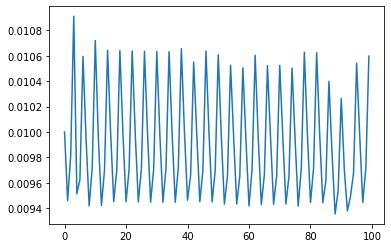

In [64]:
# visualize costs
plt.plot(np.arange(num_iterations), cost_list)
plt.show()

In [65]:
# report accuracy, Precision, Recall and F1 using lib
from sklearn.metrics import classification_report
y_predict_2 = np.where(np.dot(X_test, weights)<0, -1, 1)
print(classification_report(y_test,y_predict_2))

              precision    recall  f1-score   support

          -1       0.50      0.28      0.36        29
           1       0.53      0.75      0.62        32

    accuracy                           0.52        61
   macro avg       0.52      0.51      0.49        61
weighted avg       0.52      0.52      0.50        61



# Task 4 - Compare SVM results with Logistic Regression - (4 points)

Which model performs better here? Compare your results wit the logistic regression. You can use libraries for this task. 


In [66]:
# Add your code Here! 
# use lib to do logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='none', fit_intercept=False)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

# compare two results
print('Logistic regression model performs better here with a higher accuracy of 0.59.')

              precision    recall  f1-score   support

          -1       0.58      0.48      0.53        29
           1       0.59      0.69      0.64        32

    accuracy                           0.59        61
   macro avg       0.59      0.59      0.58        61
weighted avg       0.59      0.59      0.59        61

Logistic regression model performs better here with a higher accuracy of 0.59.


# Task 5 - Apply a kernel function to improve SVM performance (4 points)

Use the Scikit-learn librariy and apply a kernel function to improve the SVM performance. Check if this is possible. 


In [67]:
# I chose linear kernel here

# model = svm.LinearSVC(C=.01, max_iter=100, fit_intercept=False)
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.47540983606557374


C:\Users\Ley\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [68]:
model = svm.SVC(C=.01, kernel = 'linear', max_iter=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print('Yes, the result seems improved by linear kernel.')

Accuracy Score: 0.5901639344262295


C:\Users\Ley\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
